In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d='/glade/campaign/cgd/tss/projects/PPE/forcing/SSP126/SUBSET/'

In [29]:
d='/glade/campaign/cgd/tss/projects/PPE/PPEn11_LHC/SSP126/hist/'
f='PPEn11_transient_SSP126_LHC0000.clm2.h0.2015-02-01-00000.nc'
h0=xr.open_dataset(d+f)
f='PPEn11_transient_SSP126_LHC0000.clm2.h0.2095-02-01-00000.nc'
h1=xr.open_dataset(d+f)

In [66]:
sg=xr.open_dataset('clusters.clm51_PPEn02ctsm51d021_2deg_GSWP3V1_leafbiomassesai_PPE3_hist.annual+sd.400.nc')

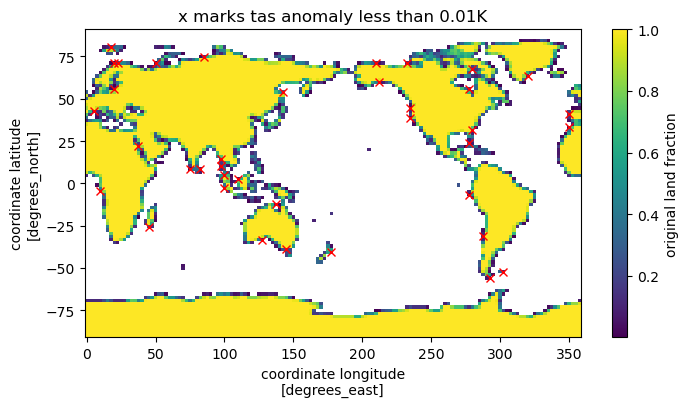

In [83]:
plt.figure(figsize=[8,4])
(sg.landfrac_orig).plot()
dt=h1.TBOT.isel(time=0)-h0.TBOT.isel(time=0)
ix=abs(dt)<0.01
plt.plot(h0.grid1d_lon[ix],h0.grid1d_lat[ix],'rx')
plt.title('x marks tas anomaly less than 0.01K');
plt.savefig('anomaly_map.png',dpi=300,bbox_inches='tight')

In [56]:
lfs=np.array([h0.landfrac[j-1,i-1] for i,j in zip(h0.grid1d_ixy.astype(int),h0.grid1d_jxy.astype(int))])

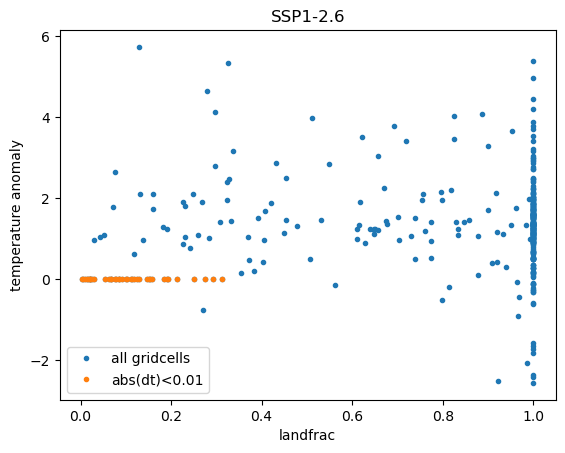

In [82]:
ix=abs(dt)<0.01
plt.plot(lfs,dt,'.')
plt.plot(lfs[ix],dt[ix],'.')
plt.xlabel('landfrac')
plt.ylabel('temperature anomaly')
plt.legend(['all gridcells','abs(dt)<0.01'])
plt.title('SSP1-2.6')
plt.savefig('anomaly_scatter.png',dpi=300,bbox_inches='tight');